# Conformational analysis of CXCL12
by Gerard Martinez

Download all the required files for the tutorial from this [link](http://pub.htmd.org/confana1036hbl2450olw/filtered.tar.gz)

(warning: 2.6 Gb)

You can watch the presentation [here](https://youtu.be/I9VISC29Gc4)

In [1]:
%pylab inline
from htmd import *
htmd.config(viewer='ngl')
os.chdir('/webdata/confana1036hbl2450olw/')  # Skip this command.

HTMD. All material of HTMD2015 will be soon made available

New HTMD version (0.1.15) is available. You are currently on (0.1.13). Use 'conda update htmd' to update to the new version.
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## 1. Introduction

### CXCL12 is a chemokine involved in...
*  many types of cancer 
*  inflammatory diseases 
*  early development events

### We performed...
* ~300 simulations x 200ns each (~60 microseconds in total)
* we filtered out the water from our trajectories 

![](http://pub.htmd.org/confana1036hbl2450olw/system-protein2.png)

## 2. Sampling major conformational states

In our lab we have tried many different metrics to assess the overall conformational changes of a protein. From them all, phi and psi angles of the protein backbone (dihedrals) have been the most successful descriptors in "blindly" capturing the major protein conformations.

In this section we will project our trajectories on the backbone dihedrals and, we will reduce the dimensionality by using tICA and then we will build a Markov Model to asses the major protein conformations in equilibrium. 

![](http://pub.htmd.org/confana1036hbl2450olw/conformations.png)

## Calculate metrics: protein backbone dihedrals

In [2]:
fsims = simlist(glob('./filtered/*/'), './filtered/filtered.pdb')

2015-12-17 14:06:50,142 - htmd.simlist - INFO - Starting listing of simulations.
Creating simlist: 100% (289/289) [#################################] eta 00:00 -
2015-12-17 14:06:50,501 - htmd.simlist - INFO - Finished listing of simulations.


CXCL12 has a very flexible C-terminus loop as well as a transiently disorderable N-terminal alfa helix. In this study we are not interested in them but in the core of the chemokine. For this reason, we will select residues from 10 to 54. 

In [3]:
metr = Metric(fsims)
metr.projection(MetricDihedral(protsel='protein and resid 10 to 54', sincos=True))
data = metr.project()
data.fstep = 0.1

2015-12-17 14:06:51,427 - htmd.projections.metricdiherdal - INFO - Precalculating phi and psi angle atom selections
2015-12-17 14:06:52,316 - htmd.projections.metricdiherdal - INFO - Finished precalculating phi and psi.
2015-12-17 14:06:52,332 - htmd.projections.metric - INFO - Metric: Starting projection of trajectories.


[Parallel(n_jobs=-2)]: Done   1 out of 289 | elapsed:    0.7s remaining:  3.5min
[Parallel(n_jobs=-2)]: Done  21 out of 289 | elapsed:    1.7s remaining:   22.2s
[Parallel(n_jobs=-2)]: Done  48 out of 289 | elapsed:    3.8s remaining:   19.1s
[Parallel(n_jobs=-2)]: Done  75 out of 289 | elapsed:    5.7s remaining:   16.3s
[Parallel(n_jobs=-2)]: Done 102 out of 289 | elapsed:    7.5s remaining:   13.7s
[Parallel(n_jobs=-2)]: Done 129 out of 289 | elapsed:    9.3s remaining:   11.5s
[Parallel(n_jobs=-2)]: Done 156 out of 289 | elapsed:   11.1s remaining:    9.4s
[Parallel(n_jobs=-2)]: Done 183 out of 289 | elapsed:   13.2s remaining:    7.7s
[Parallel(n_jobs=-2)]: Done 210 out of 289 | elapsed:   15.0s remaining:    5.6s
[Parallel(n_jobs=-2)]: Done 237 out of 289 | elapsed:   16.9s remaining:    3.7s
[Parallel(n_jobs=-2)]: Done 264 out of 289 | elapsed:   18.6s remaining:    1.8s
[Parallel(n_jobs=-2)]: Done 289 out of 289 | elapsed:   20.5s finished


2015-12-17 14:07:13,086 - htmd.projections.metric - INFO - Finished projecting the trajectories.
2015-12-17 14:07:13,088 - htmd.projections.metric - WARNING - Multiple framesteps were read from the simulations. Taking the statistical mode: 0.1ns. If it looks wrong, you can modify it by manually setting the MetricData.fstep property.


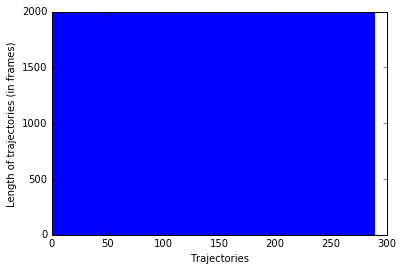

In [4]:
data.plotTrajSizes()

##  Dimensionality reduction

In [5]:
tica = TICA(data, 20)
dataTica = tica.project(3)

## Clustering

In [6]:
dataTica.cluster(MiniBatchKMeans(n_clusters=200), mergesmall=5)

## MSM analysis and visualization

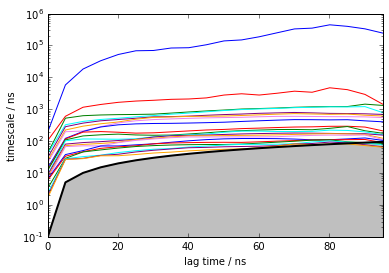

In [7]:
model = Model(dataTica)
model.plotTimescales(lags=list(range(1,1000,50)))

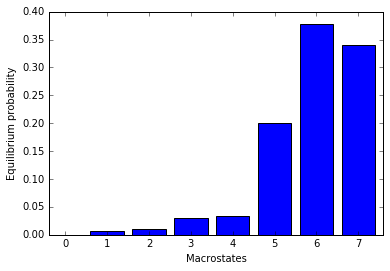

[  3.62227653e-04   6.27850327e-03   9.81777963e-03   2.96818659e-02
   3.44476993e-02   2.01180386e-01   3.78143163e-01   3.40088375e-01]


In [8]:
model.markovModel(600, 8)
eqDist = model.eqDistribution()
print(eqDist)

In [9]:
#we can now visualize representatives for each of the equilibrium species 
model.numsamples=1
model.viewStates(protein=True)

[Parallel(n_jobs=-2)]: Done   1 out of   8 | elapsed:    6.5s remaining:   45.8s
[Parallel(n_jobs=-2)]: Done   2 out of   8 | elapsed:   10.3s remaining:   31.0s
[Parallel(n_jobs=-2)]: Done   3 out of   8 | elapsed:   14.2s remaining:   23.6s
[Parallel(n_jobs=-2)]: Done   4 out of   8 | elapsed:   18.0s remaining:   18.0s
[Parallel(n_jobs=-2)]: Done   5 out of   8 | elapsed:   21.8s remaining:   13.1s
[Parallel(n_jobs=-2)]: Done   6 out of   8 | elapsed:   24.9s remaining:    8.3s
[Parallel(n_jobs=-2)]: Done   7 out of   8 | elapsed:   29.3s remaining:    4.2s
[Parallel(n_jobs=-2)]: Done   8 out of   8 | elapsed:   32.7s finished


## Statistics
### What are the major differences between the states X and Y?

['Sine of angle of resid 16 atoms: N CA C resid 17 atoms: N '
 'Cosine of angle of resid 16 atoms: N CA C resid 17 atoms: N '
 'Sine of angle of resid 16 atoms: C resid 17 atoms: N CA C '
 'Cosine of angle of resid 24 atoms: N CA C resid 25 atoms: N '
 'Sine of angle of resid 32 atoms: N CA C resid 33 atoms: N '
 'Cosine of angle of resid 32 atoms: N CA C resid 33 atoms: N '
 'Sine of angle of resid 32 atoms: C resid 33 atoms: N CA C '
 'Sine of angle of resid 44 atoms: N CA C resid 45 atoms: N '
 'Cosine of angle of resid 44 atoms: N CA C resid 45 atoms: N '
 'Sine of angle of resid 44 atoms: C resid 45 atoms: N CA C ']


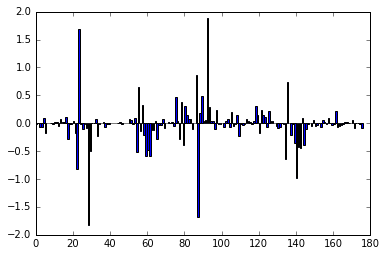

In [10]:
means = getStateStatistic(model, data, range(model.macronum))
plt.figure()
plt.bar(range(len(means[0])), means[7] - means[6])
idx = np.where(np.abs(means[7] - means[6]) > 0.6)[0]
print(data.map[idx])

In [13]:
# we can visualize which residues are different between states
filtered = Molecule('./filtered/filtered.pdb')
filtered.view(sel='protein',style='NewCartoon',hold=True)
filtered.view(sel='resid 16 17 24 25 32 33 44 45',style='Licorice')

## Mapping back
### Which trajectory originated the state X?

In [14]:
np.where(model.macro_ofmicro == 6)

(array([11, 12]),)

In [15]:
_,rel = model.sampleStates([10],[10],statetype='micro')
print(rel)

[array([[ 64,  81],
       [ 88,  53],
       [ 52, 203],
       [270, 482],
       [186,  97],
       [ 25,  30],
       [196, 115],
       [169, 178],
       [  4, 736],
       [175,  53]])]


In [16]:
print(model.data.simlist[232])

id = 232
parent = None
input = []
trajectory = ['./filtered/9x9/9x9-GERARD_VERYLONG_CXCL12_confAna-0-1-RND2283_9.filtered.xtc']
molfile = ./filtered/filtered.pdb


## 3. Studying a defined reaction coordinate

Revising the literature related to CXCL12, we find a paper published by Andrea Bernini et al. (2014) where they describe the opening of a pocket in CXCL12 located between the 2nd and 3rd beta sheet (see pictures attached). To try to capture this phenomenon in our simulations, we will project our trajectories along the 2nd and 3rd beta-sheet distance. 

![](http://pub.htmd.org/confana1036hbl2450olw/openclose_struc.jpg)
![](http://pub.htmd.org/confana1036hbl2450olw/openclose_asa.png)

*Figures extracted from "Searching for protein binding sites from Molecular Dynamics simulations and paramagnetic fragment-based NMR studies", Andrea bernini et al., 2014 Mar;1844(3):561-6. doi: 10.1016/j.bbapap.2013.12.012. Epub 2013 Dec 27*

In [17]:
# The first selection corresponds to beta-sheet 2 carbons alpha, the second one to beta-sheet 3 CA.
# We specify metric='contacts' to create contact maps instead of proper distances,
# this means: create an interatom matrix and put 1 if the distance is below cutoff; 0 otherwise. 
data3 = MetricDistance.project(fsims, 'resid 38 to 42 and noh', 
                               'resid 22 to 28 and noh', metric='contacts')
data3.fstep = 0.1

[Parallel(n_jobs=-2)]: Done   1 out of 289 | elapsed:    1.7s remaining:  8.2min
[Parallel(n_jobs=-2)]: Done  21 out of 289 | elapsed:    3.3s remaining:   42.5s
[Parallel(n_jobs=-2)]: Done  48 out of 289 | elapsed:    6.6s remaining:   33.0s
[Parallel(n_jobs=-2)]: Done  75 out of 289 | elapsed:    8.9s remaining:   25.4s
[Parallel(n_jobs=-2)]: Done 102 out of 289 | elapsed:   12.2s remaining:   22.4s
[Parallel(n_jobs=-2)]: Done 129 out of 289 | elapsed:   15.4s remaining:   19.1s
[Parallel(n_jobs=-2)]: Done 156 out of 289 | elapsed:   18.3s remaining:   15.6s
[Parallel(n_jobs=-2)]: Done 183 out of 289 | elapsed:   21.3s remaining:   12.3s
[Parallel(n_jobs=-2)]: Done 210 out of 289 | elapsed:   24.5s remaining:    9.2s
[Parallel(n_jobs=-2)]: Done 237 out of 289 | elapsed:   27.9s remaining:    6.1s
[Parallel(n_jobs=-2)]: Done 264 out of 289 | elapsed:   30.8s remaining:    2.9s
[Parallel(n_jobs=-2)]: Done 289 out of 289 | elapsed:   33.6s finished


In [18]:
# tICA projection (dimensionality reduction along the slow process)
tica3 = TICA(data3, 20)
dataTica3 = tica3.project(3)

In [19]:
# Clustering
dataTica3.cluster(MiniBatchKMeans(n_clusters=200), mergesmall=5)

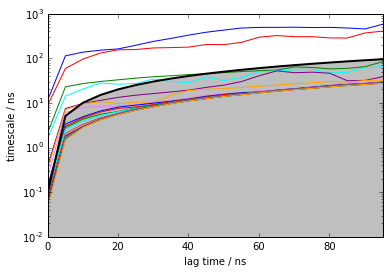

In [20]:
# Plot timescales
model3 = Model(dataTica3)
model3.plotTimescales(lags=list(range(1,1000,50)))

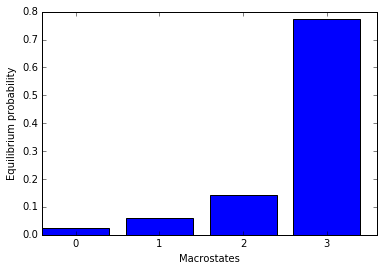

[ 0.02292385  0.06099237  0.14430835  0.77177542]


In [21]:
# Make Markov Model. we want to pick a lagtime where the timescales are converged (timescale is flat).
# 600 is the lagtime we want to use (600 frames is equivalent to 60ns). 4 is the number of macrostates.
model3.markovModel(600, 4)
eqDist = model3.eqDistribution()
print(eqDist)

In [22]:
# Visualize states
model3.numsamples = 1
model3.viewStates(protein=True)

[Parallel(n_jobs=-2)]: Done   1 out of   4 | elapsed:   10.6s remaining:   31.8s
[Parallel(n_jobs=-2)]: Done   2 out of   4 | elapsed:   16.5s remaining:   16.5s
[Parallel(n_jobs=-2)]: Done   3 out of   4 | elapsed:   22.7s remaining:    7.6s
[Parallel(n_jobs=-2)]: Done   4 out of   4 | elapsed:   27.2s finished


![](http://pub.htmd.org/confana1036hbl2450olw/conformation_open.png)

Did you see any macrostate where the pocket is open? what is the equilibrium population probability? Let's try to find the trajectory that produced the state...

In [23]:
# Map back the trajectory/ies that originated the macro. Substitute 1 for the macro that showed the pocket opening.
# This function is giving you the microclusters that are inside a given macrocluster
np.where(model3.macro_ofmicro ==1)

(array([ 2,  6, 23, 46]),)

In [24]:
# substitute 48 for the micro number from the previous step
# This function gives you trajectory-frame pairs that visited a given micro
_,rel = model3.sampleStates([48],[5],statetype='micro')
print(rel)

[array([[ 228,  672],
       [  23, 1016],
       [ 159,  265],
       [ 124,  739],
       [ 124,  399]])]


In [25]:
print(model3.data.simlist[277])

id = 277
parent = None
input = []
trajectory = ['./filtered/10x23/10x23-GERARD_VERYLONG_CXCL12_confAna-0-1-RND9861_9.filtered.xtc']
molfile = ./filtered/filtered.pdb


In [33]:
# Calculate RMSD of the site of interest for a selected trajectory
simus = simlist(glob('./filtered/10x23/'), './filtered/filtered.pdb')

Creating simlist: 100% (1/1) [#####################################] eta --:-- |


In [39]:
refmol = Molecule('./filtered/filtered.pdb')
rmsd = MetricRmsd.project(simus, refmol, 'resid 38 to 42 or resid 22 to 28 and noh', trajalnstr='protein')

[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done   1 out of   1 | elapsed:    1.9s finished


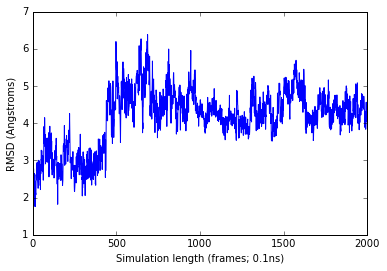

In [40]:
# Do you see the pocket opening at 50ns?
plt.plot(rmsd.dat[0])
plt.xlabel('Simulation length (frames; 0.1ns)', fontsize=10)
plt.ylabel('RMSD (Angstroms)', fontsize=10)

In [41]:
# You can also visualize the trajectory from your browser
refmol.read('./filtered/10x23/10x23-GERARD_VERYLONG_CXCL12_confAna-0-1-RND9861_9.filtered.xtc')
refmol.align('protein')
refmol.view()

![](http://pub.htmd.org/confana1036hbl2450olw/view_trajectory.png)